# Project 5: Unsupervised Learning
## Object recognition
### Objective:
    The objective of this project is to classify a given silhouette as one of three types of vehicle, using a set of 
    features extracted from the silhouette.

### Dataset:
    vehicle.csv

### Attribute Information:

    Compactness
    Circularity
    Distance Circularity
    Radius ratio
    pr.axis aspect ratio
    max.length aspect ratio
    scatter ratio
    elongatedness
    pr.axis rectangularity
    max.length rectangularity
    scaled variance along major axis
    scaled variance along minor axis
    scaled radius of gyration
    skewness about major axis
    skewness about minor axis
    kurtosis about minor axis
    kurtosis about major axis
    hollows ratio

In [26]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection  import GridSearchCV
from sklearn.model_selection  import cross_val_score
from sklearn.decomposition import PCA
from scipy.stats import zscore

### Load dataset

In [2]:
dataset = pd.read_csv("C:\\Users\\exsxaxr\\Downloads\\vehicle-1.csv")
dataset.shape

(846, 19)

In [3]:
dataset.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
# Except 'class' all attributes are in numeric format.

In [6]:
dataset.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [7]:
# Count the number of vehicles in each class
dataset['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

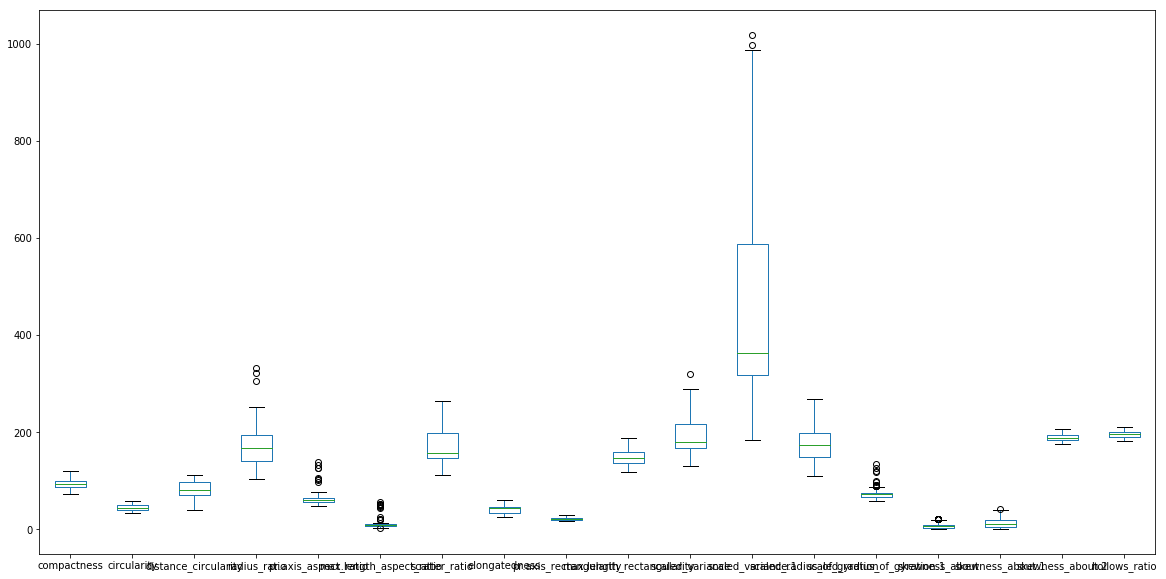

In [8]:
dataset.plot(kind='box', figsize=(20,10))
plt.show()

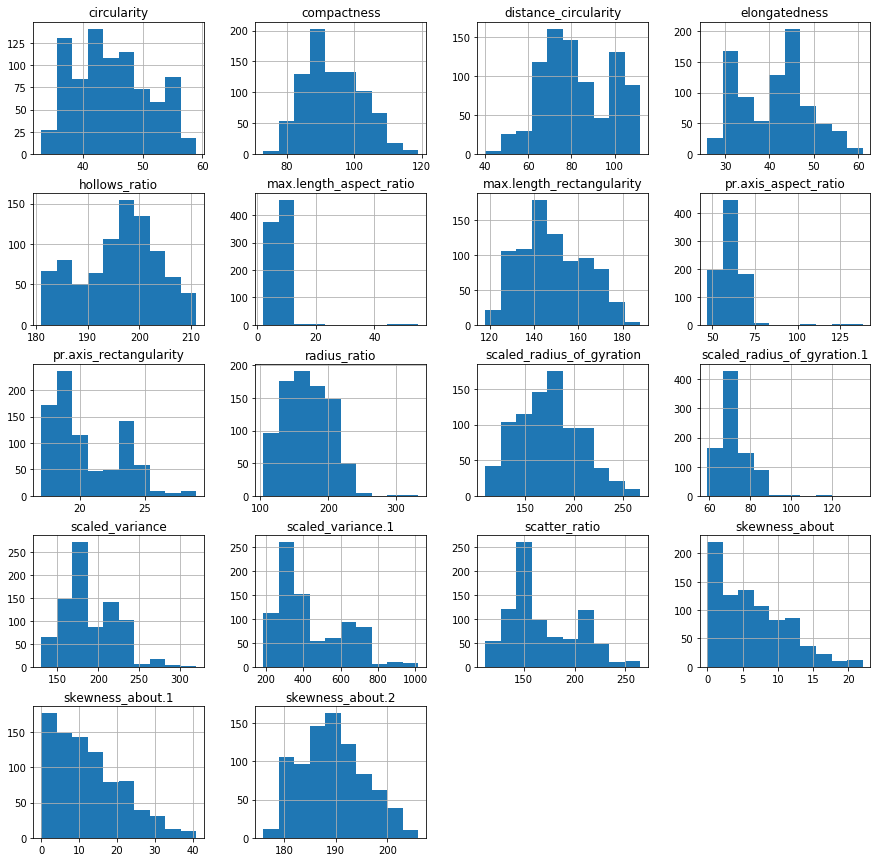

In [9]:
dataset.hist(figsize=(15,15))
plt.show()

#### Dealing with missing values

In [10]:
dataset.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [11]:
# We have some null values in many columns.
# Since most of these columns are normally distributed, we can replace the null values with its median value

In [12]:
# Replace null values with its median values
for i in dataset.columns[:-1]:
    median = dataset[i].median()
    dataset[i] = dataset[i].fillna(median)   

In [13]:
dataset.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [14]:
# Now there are no null values.

#### BiVariate Analysis

C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


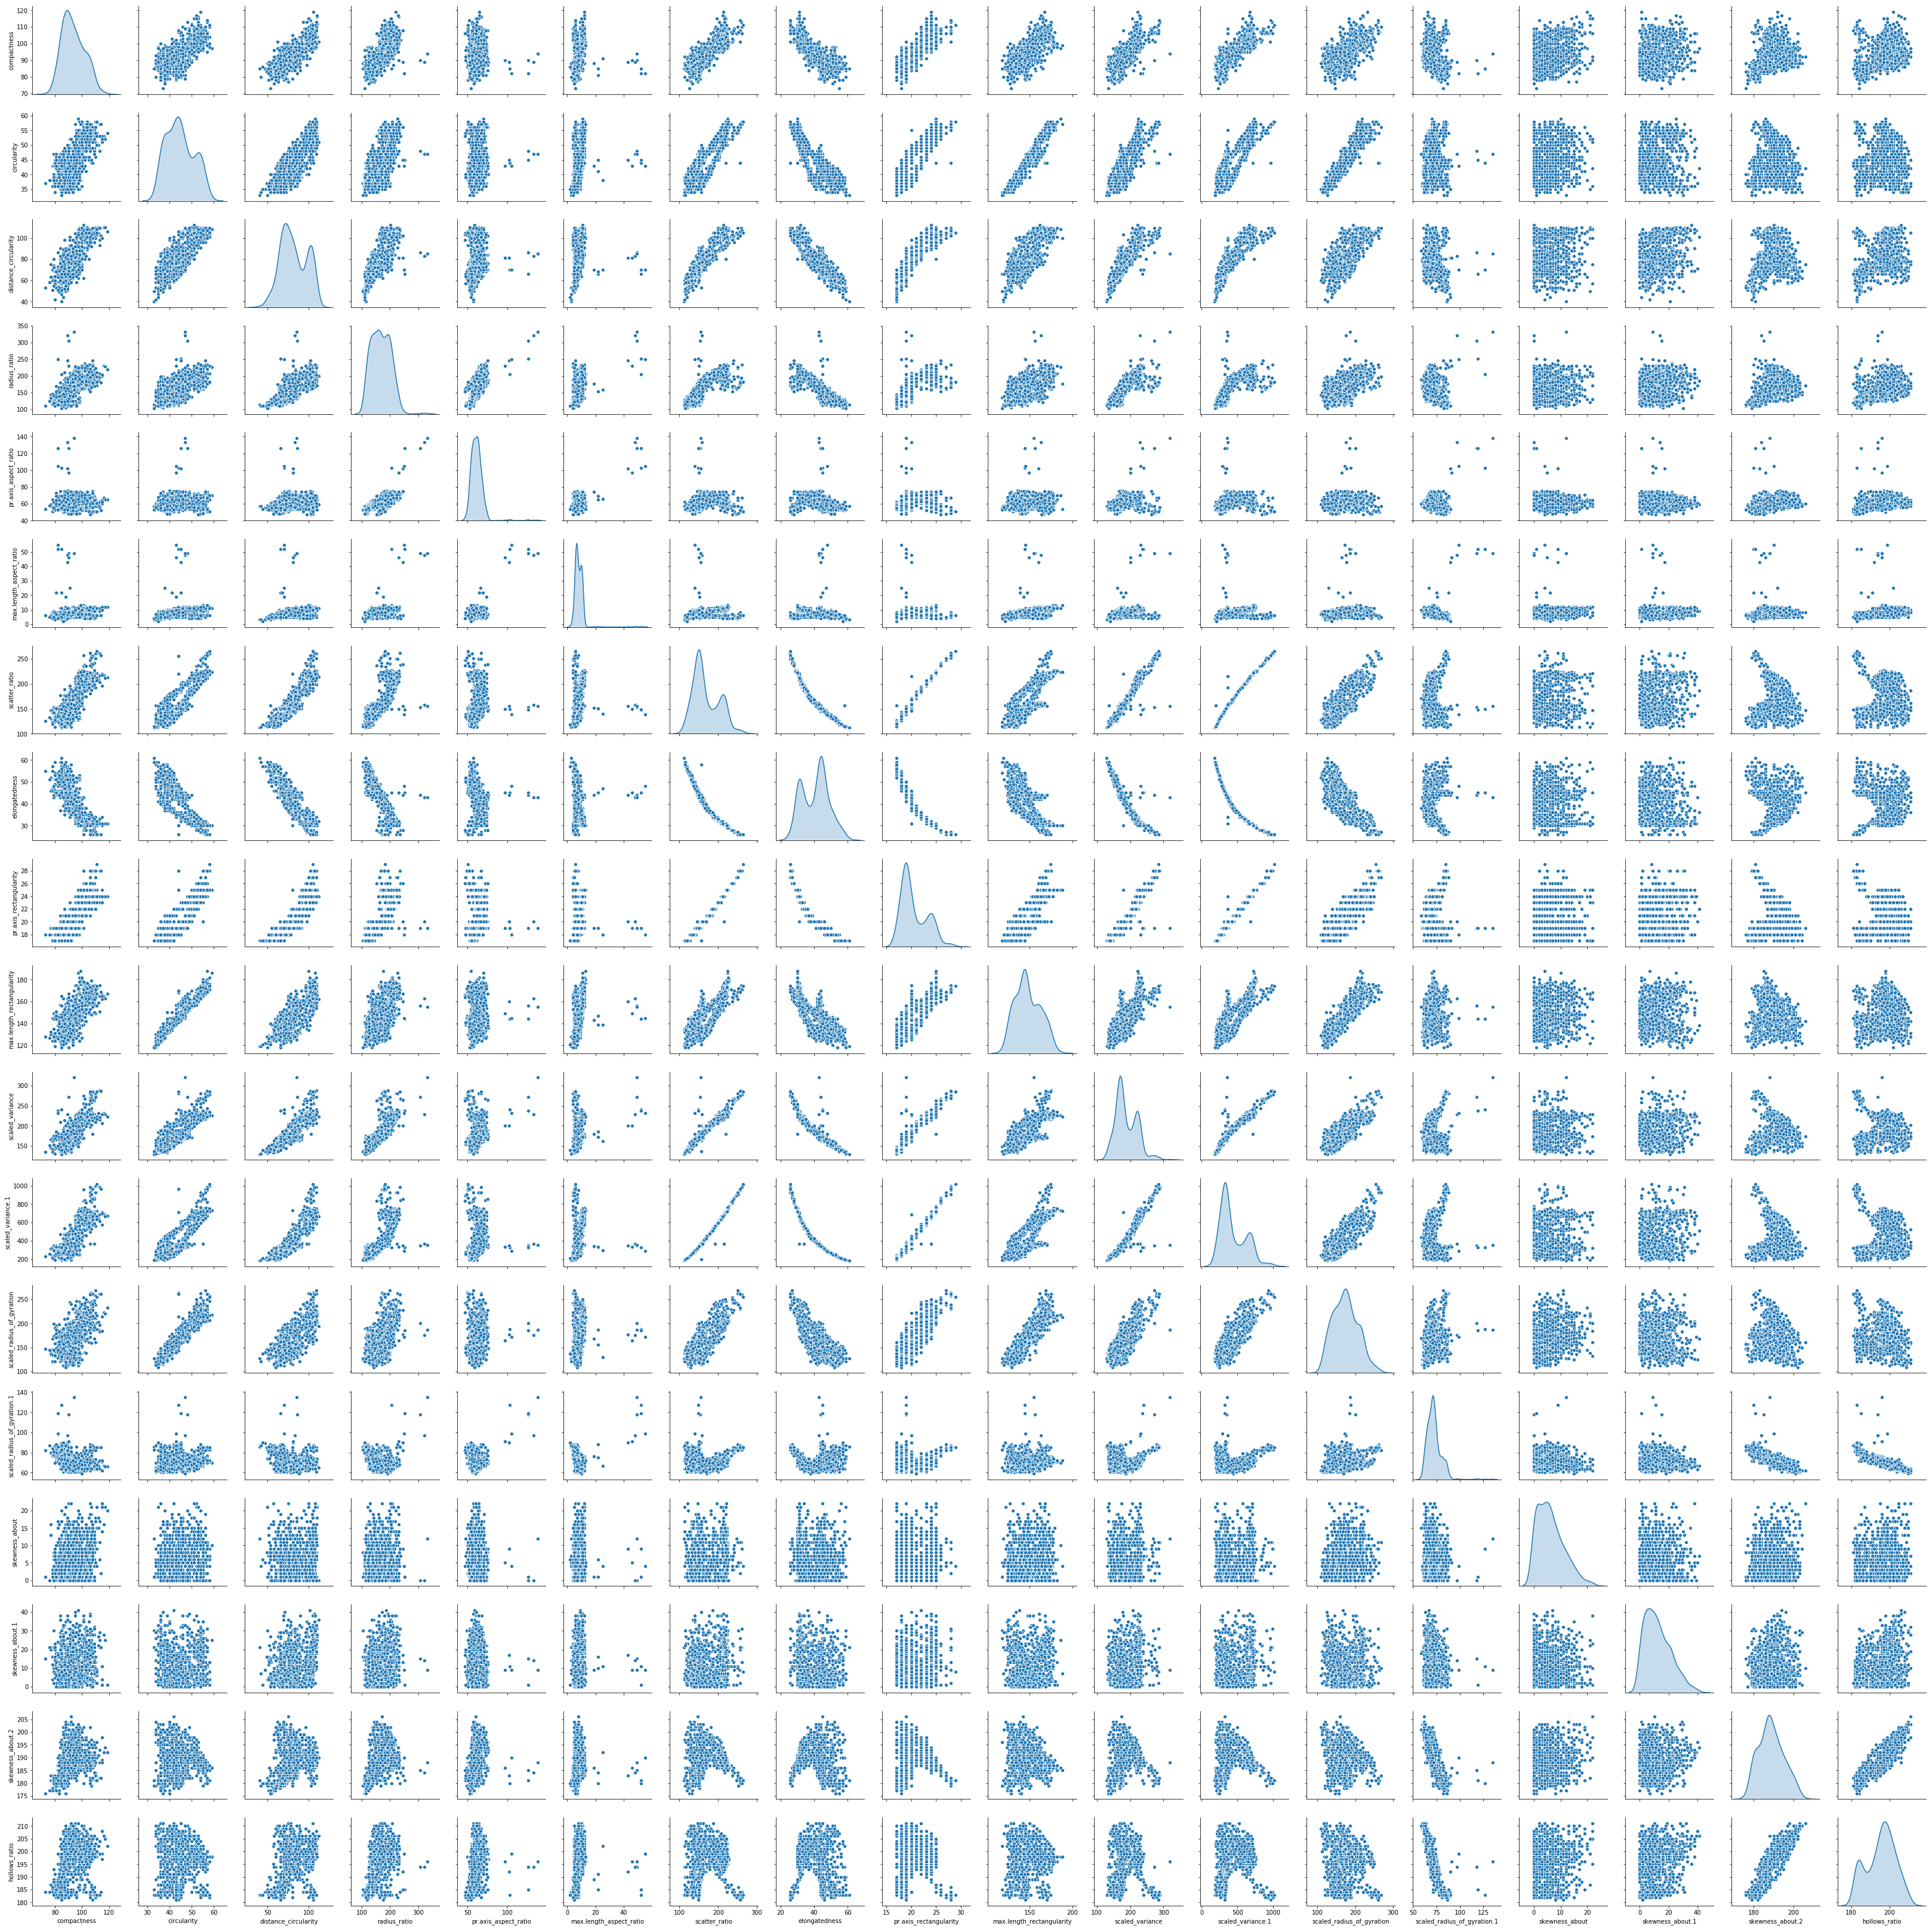

In [23]:
# Plotting density curve
sns.pairplot(dataset, diag_kind='kde')

In [15]:
dataset.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                              0.015599       0.074458   
skewness_about.1                            0.043422       0.212428   
skewness_about.2                           -0.

In [16]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(dataset.drop(columns='class'))

C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
# independant variable
X = scaled_df
# dependent variable
y = dataset['class']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

#### Training Model

In [19]:
# Training SVC model using the scaled attributes

model = SVC()
model.fit(X_train,y_train)
scaled_score_svc = model.score(X_test, y_test)
print(scaled_score_svc)

0.9528301886792453


C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
# Using GridsearchCV for cross validation

model = SVC()
params = {'C': [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf'], 'gamma': ['auto', 'scale']}
model1 = GridSearchCV(model, param_grid=params, verbose=5)
model1.fit(X_train, y_train)
print("Best hyper parameters:\n", model1.best_params_)

C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.01, gamma=auto, kernel=linear ...............................
[CV]  C=0.01, gamma=auto, kernel=linear, score=0.8490566037735849, total=   0.0s
[CV] C=0.01, gamma=auto, kernel=linear ...............................
[CV]  C=0.01, gamma=auto, kernel=linear, score=0.8246445497630331, total=   0.0s
[CV] C=0.01, gamma=auto, kernel=linear ...............................
[CV]  C=0.01, gamma=auto, kernel=linear, score=0.7914691943127962, total=   0.0s
[CV] C=0.01, gamma=auto, kernel=rbf ..................................
[CV]  C=0.01, gamma=auto, kernel=rbf, score=0.5047169811320755, total=   0.0s
[CV] C=0.01, gamma=auto, kernel=rbf ..................................
[CV]  C=0.01, gamma=auto, kernel=rbf, score=0.5071090047393365, total=   0.0s
[CV] C=0.01, gamma=auto, kernel=rbf ..................................
[CV]  C=0.01, gamma=auto, kernel=rbf, score=0.5071090047393365, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=lin

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.9s finished


In [25]:
# So we got the best hyper parameters 

model = SVC(C=1, kernel='rbf', gamma = 'auto')
scores = cross_val_score(model, X, y, cv=10)
CV_score = scores.mean()
print(CV_score)

0.966873676299788


#### Dimensionality Reduction

[0.52186034 0.68915802 0.79478441 0.86025901 0.9111577  0.94112183
 0.96103549 0.97335049 0.98226265 0.98735979 0.99104984 0.9936357
 0.99562195 0.99714304 0.99828498 0.99927917 0.9998355  1.        ]


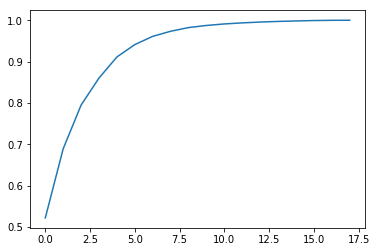

In [30]:
# Lets create PCA from the attributes

pca = PCA().fit(scaled_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
print(np.cumsum(pca.explained_variance_ratio_))

In [50]:
# Since more than 95% of the variance is captured within the 9 PCs, lets take n_components as 9

pca = PCA(n_components=9)
X = pca.fit_transform(scaled_df)
y = dataset['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
Xpca = pca.transform(scaled_df)
Xpca

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00, ...,
        -9.01124283e-01, -3.81106357e-01, -8.66309530e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01, ...,
         3.78636988e-01,  2.47058909e-01,  1.47249715e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02, ...,
        -3.45837595e-02,  4.82771767e-01, -3.10832555e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01, ...,
         5.73248962e-01,  1.10477865e-01, -6.52536352e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01, ...,
        -2.02405787e-01,  3.20621635e-01, -2.01263247e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01, ...,
         5.80978683e-02, -2.48034955e-01, -4.29903644e-01]])

C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


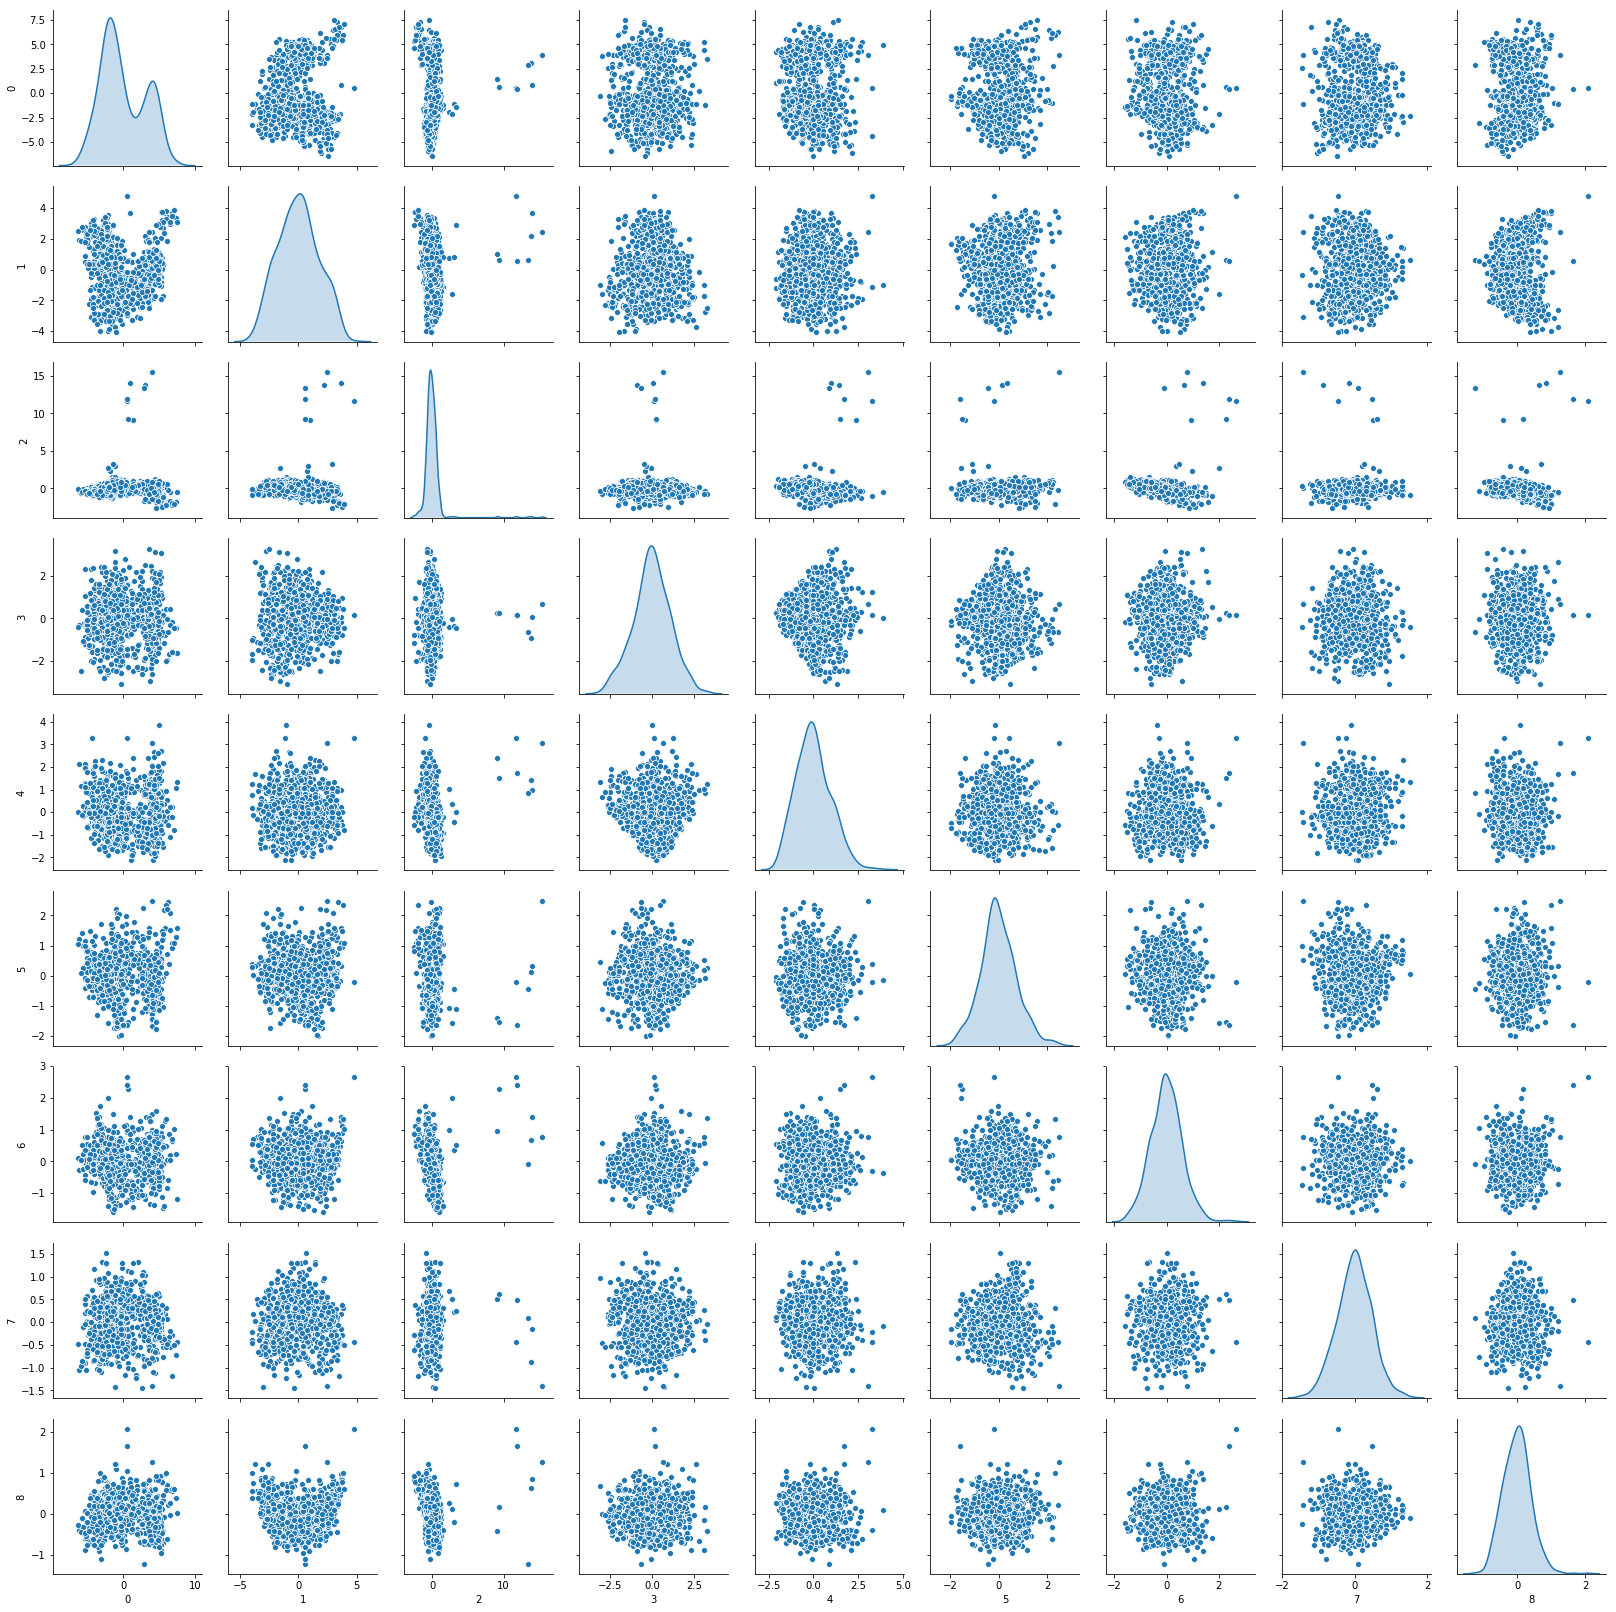

In [52]:
sns.pairplot(pd.DataFrame(Xpca), diag_kind='kde')

In [42]:
# Training SVC model using the PCs instead of actual attributes

In [43]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
PC_score = model.score(X_test, y_test)
print(PC_score)

0.9622641509433962


In [44]:
# Lets check the cross validation score

model = SVC(C=1, kernel='rbf', gamma='auto')
scores = cross_val_score(model, X, y, cv=10)
PCA_CV_score = scores.mean()
print(PCA_CV_score)

0.9551089704174351


## Result

In [47]:
result = pd.DataFrame({'SVC': ['Actual scaled attributes', '9 PCA'], 
                      'Accuracy': [scaled_score_svc, PC_score], 
                      'CV-Score': [CV_score, PCA_CV_score]})

In [48]:
result

SVC  Accuracy  CV-Score
0  Actual scaled attributes  0.952830  0.966874
1                     9 PCA  0.962264  0.955109

In [49]:
# Accuracy of actual attributes using SVC model is 95.3% and the score is increased after cross validation upto 96.6%
# Wheras in 9 principal component, the accuracy score is 96.2% which got reduced to 95.5% in cross validation

# So we have achieved an almost same or slightly better result using 9 attributes than the actual 18 attributes

## Summary

    1. Performed data preprocessing for understanding the data and trested missing values by substituting it with median.
    2. Plotted a pairplot and correlation table for understanding the relationship between attributes.
    3. Used support vector machine model for classifying the class of vahicles
    4. Plotted elbow plot found out the apt number of dimension (9) and used PCA 
    5. Used gridsearchCV for cross validation
    6. Analyzed the difference of accuracy with and without PCA on X attributes.